In [174]:
# Small number of states

import time
import io
import numpy as np
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example
size = 5
P_s, R_s = example.forest(S = size,r1=4,r2=1, p=0.1)

In [177]:
# Value iteration
time1 = time.perf_counter()

vi_s = mdp.ValueIteration(P_s, R_s, 0.5, max_iter = 1000)
vi_s.run()
print('The number of iterations taken to complete the computation. :',vi_s.iter)
print('The amount of CPU time used to run the algorithm :',vi_s.time)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

The number of iterations taken to complete the computation. : 8
The amount of CPU time used to run the algorithm : 0.016045093536376953
time for running the algorithm = 0.020276497001759708 s


Optimal value function :
[[0.61753831]
 [1.30603382]
 [1.5147219 ]
 [3.3147219 ]
 [7.3147219 ]]
Optimal policy :
[[0]
 [1]
 [0]
 [0]
 [0]]


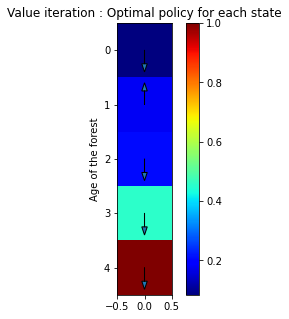

In [178]:
# Value function and policy visualization

list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_s = list(vi_s.V)
list_Z = []
for i in range(len(value_s)):
    list_Z.append(value_s[i]/max(value_s))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,1))

print('Optimal value function :')
print(np.reshape(vi_s.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(vi_s.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

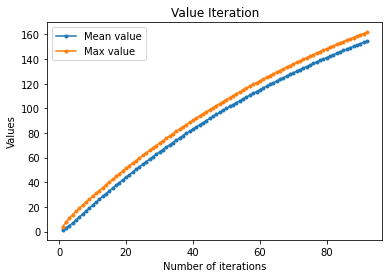

In [156]:
# Value vs iteration

list_meanV_VI_s = []
list_maxV_VI_s = []
list_iteration_VI_s = []
for i in range(len(vi_s.run_stats)):
    list_meanV_VI_s.append(vi_s.run_stats[i].get('Mean V'))
    list_maxV_VI_s.append(vi_s.run_stats[i].get('Max V'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_VI_s, list_meanV_VI_s, marker ='.', label="Mean value")
ax.plot(list_iteration_VI_s, list_maxV_VI_s, marker=".", label="Max value")
ax.legend()
plt.show()

In [181]:
# Policy Iteration

pi_s = mdp.PolicyIteration(P_s, R_s, 0.5, eval_type=1, max_iter = 1000)
pi_s.run()
print('The number of iterations taken to complete the computation. :',pi_s.iter)
print('The amount of CPU time used to run the algorithm :',pi_s.time)

The number of iterations taken to complete the computation. : 3
The amount of CPU time used to run the algorithm : 0.0034332275390625


Optimal value function :
[[0.62065869]
 [1.3103182 ]
 [1.52908482]
 [3.32908482]
 [7.32908482]]
Optimal policy :
[[0]
 [1]
 [0]
 [0]
 [0]]


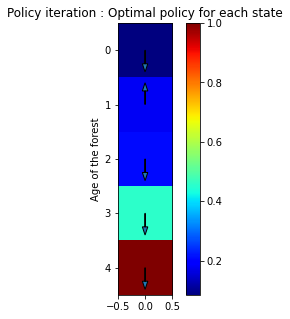

In [182]:
# Value function and policy visualization

list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_s = list(pi_s.V)
list_Z = []
for i in range(len(value_s)):
    list_Z.append(value_s[i]/max(value_s))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,1))

print('Optimal value function :')
print(np.reshape(pi_s.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(pi_s.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Policy iteration : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

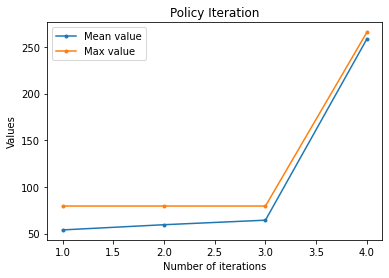

In [159]:
# Convergence plot : Max value vs Iteration

list_meanV_PI_s = []
list_maxV_PI_s = []
list_iteration_PI_s = []
for i in range(len(pi_s.run_stats)):
    list_meanV_PI_s.append(pi_s.run_stats[i].get('Mean V'))
    list_maxV_PI_s.append(pi_s.run_stats[i].get('Max V'))
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_PI_s, list_meanV_PI_s, marker ='.', label="Mean value")
ax.plot(list_iteration_PI_s, list_maxV_PI_s, marker=".", label="Max value")
ax.legend()
plt.show()

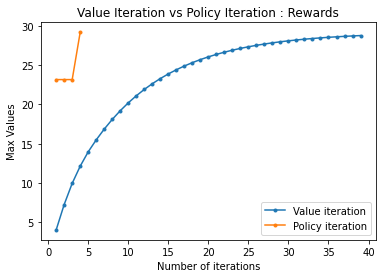

In [142]:
# Value iteration vs policy iteration : Max value
list_maxV_VI_s = []
list_maxV_PI_s = []
list_iteration_VI_s = []
list_iteration_PI_s = []
for i in range(len(pi_s.run_stats)):
    list_maxV_PI_s.append(pi_s.run_stats[i].get('Max V'))
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))

for i in range(len(vi_s.run_stats)):
    list_maxV_VI_s.append(vi_s.run_stats[i].get('Max V'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))
    
fig, ax = plt.subplots()
ax.set_title('Value Iteration vs Policy Iteration : Rewards')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Values')
ax.plot(list_iteration_VI_s, list_maxV_VI_s, marker ='.', label="Value iteration")
ax.plot(list_iteration_PI_s, list_maxV_PI_s, marker=".", label="Policy iteration")
ax.legend()
plt.show()

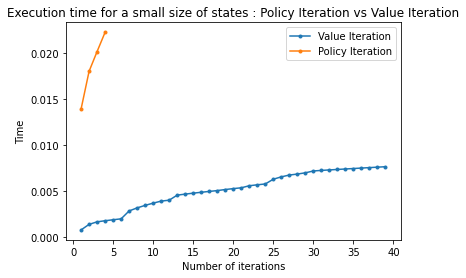

In [143]:
# Value iteration vs policy iteration : Time
list_time_VI_s = []
list_time_PI_s = []
list_iteration_PI_s = []
list_iteration_VI_s = []
for i in range(len(vi_s.run_stats)):
    list_time_VI_s.append(vi_s.run_stats[i].get('Time'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))
    
for i in range(len(pi_s.run_stats)):
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))
    list_time_PI_s.append(pi_s.run_stats[i].get('Time'))

fig, ax = plt.subplots()
ax.set_title('Execution time for a small size of states : Policy Iteration vs Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
ax.plot(list_iteration_VI_s, list_time_VI_s, marker ='.', label="Value Iteration")
ax.plot(list_iteration_PI_s, list_time_PI_s, marker=".", label="Policy Iteration")
ax.legend()
plt.show()

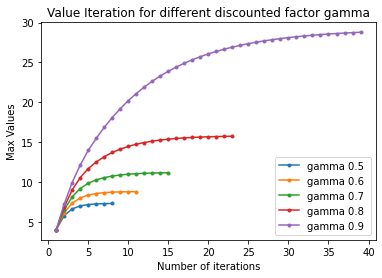

In [180]:
# Value function vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_s, R_s, 0.5+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_maxV_VI[i].append(vi_s.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration for different discounted factor gamma')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Values')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_maxV_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

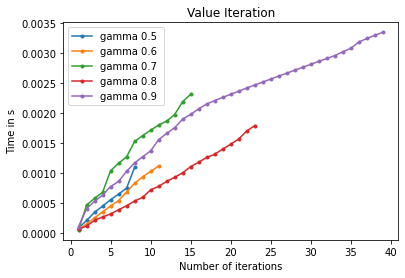

In [145]:
# Execution time vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_s, R_s, 0.5+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_time_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

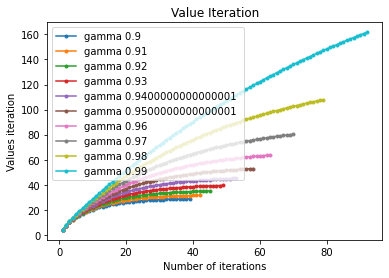

In [146]:
# value function vs number of iterations with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_s, R_s, 0.9+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_maxV_VI[i].append(vi_s.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_maxV_VI[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

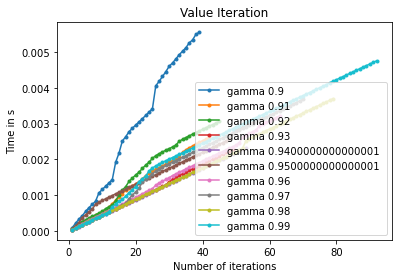

In [147]:
# execution time vs number of iterations with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_s, R_s, 0.9+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_time_VI[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

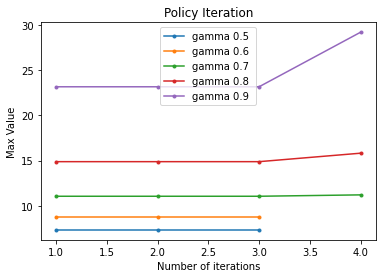

In [148]:
# policy vs number of iterations with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_PI = [[]for i in range(n_gamma)]
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_s = mdp.PolicyIteration(P_s, R_s, 0.5+i*delta_gamma)
    pi_s.run()
    for j in range(len(pi_s.run_stats)):
        list_maxV_PI[i].append(pi_s.run_stats[j].get('Max V'))
        list_iterations_PI[i].append(pi_s.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Value')
for i in range(n_gamma):
    ax.plot(list_iterations_PI[i], list_maxV_PI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

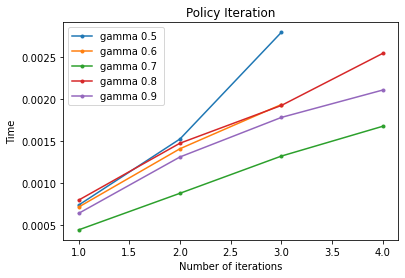

In [149]:
# execution time vs number of iterations with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_s = mdp.PolicyIteration(P_s, R_s, 0.5+i*delta_gamma)
    pi_s.run()
    for j in range(len(pi_s.run_stats)):
        list_iterations_PI[i].append(pi_s.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
for i in range(n_gamma):
    ax.plot(list_iterations_PI[i], list_time_PI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()